# МАДМО

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Домашнее задание необходимо загрузить в общий репозиторий с именной папкой 


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((1000,1000))
b = np.random.sample((1000,1000))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# Ответ: Функция shape вывела размеры матрицы
# ========
print(np.ndim(a))
print(np.ndim(b))
print(np.shape(a))
print(np.shape(b))
# ========
print(a)
print(b)

2
2
(1000, 1000)
(1000, 1000)
[[0.57767735 0.94062349 0.82605134 ... 0.13355139 0.52770422 0.89061437]
 [0.36135093 0.82470395 0.52450841 ... 0.63155199 0.39200486 0.99833591]
 [0.18626828 0.33180689 0.46656845 ... 0.15803184 0.47853876 0.8730897 ]
 ...
 [0.33907114 0.64470439 0.03849295 ... 0.22785187 0.33071473 0.24286663]
 [0.22139799 0.2462889  0.9068159  ... 0.14526811 0.49847919 0.33133279]
 [0.33860193 0.18395227 0.56644999 ... 0.12229433 0.59083282 0.62706315]]
[[0.28428962 0.51162348 0.95763156 ... 0.2403894  0.05791324 0.44265261]
 [0.82022004 0.32968581 0.07616306 ... 0.98599308 0.89664374 0.25788747]
 [0.26664375 0.73200453 0.57430578 ... 0.24793721 0.71596557 0.89951094]
 ...
 [0.06198676 0.56180428 0.08596881 ... 0.29697257 0.38885965 0.40201054]
 [0.82037473 0.62363938 0.35509648 ... 0.8040315  0.71845828 0.81046252]
 [0.31607398 0.27575196 0.41375925 ... 0.31397613 0.54846373 0.5002548 ]]


In [3]:
def mult(a, b):
    n_arows, n_acols = a.shape
    n_brows, n_bcols = b.shape
    
    if n_acols != n_brows:
        print ("Error: Matrix can't be multiplied!")
    else:
        Z = np.zeros((n_arows, n_bcols))
        for i in range(n_arows):
            for j in range(n_acols):
                for k in range(n_bcols):
                    Z[i][k] += a[i][j] * b[j][k]
    pass

In [4]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    Z = np.dot(a,b)
    
    pass

In [5]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 14min 32s


In [6]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 288 ms


### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [7]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return np.cumsum(A)/list(range(1,len(A)+1))
    pass

In [8]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    S[0] = A[0]
          
    for i in range(len(A)-1):
        S[i+1] = A[i+1] + S[i]
    
    numb = list(range(1,len(A)+1))
    
    for i in range(len(A)):
        S[i] = S[i] / numb[i]
    
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 1.11 s
Wall time: 6.77 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [9]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    
    X[1::2] = a
    X[::2] **= 3
    X[::2] = X[::2][::-1]
    
    
    return X

In [10]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X):
    temp_odd = []
    temp_even = []
    temp_even_inv = []
    Z = []

    temp_odd = int(round(len(X)/2)) * [1] 

    for i in range(0,len(X),2):
        temp_even = temp_even + [round(X[i]**3,8)] 
    
    for i in range(len(temp_even),0,-1):
        temp_even_inv = temp_even_inv + [temp_even[i-1]]
    
    for i in range(min(len(temp_even_inv), len(temp_odd))):
        Z = Z + [temp_even_inv[i]] + [temp_odd[i]]

    if len(temp_even_inv) > len(temp_odd):
        Z = Z + [temp_even_inv[-1]]
    
    if len(temp_even_inv) < len(temp_odd):
        Z = Z + [temp_odd[-1]]
   
         
    return Z

In [13]:
X = sps.uniform.rvs(size=10 ** 1) 

# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S2 = stupid_transformation(X)
%time S1 = transformation(X)

# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 0 ns
Wall time: 0 ns


1.0543660525501493e-08

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Методы numpy оказываются эффективнее, потому что многие функции написаны на C/Cyton, что делает их очень быстрыми.

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

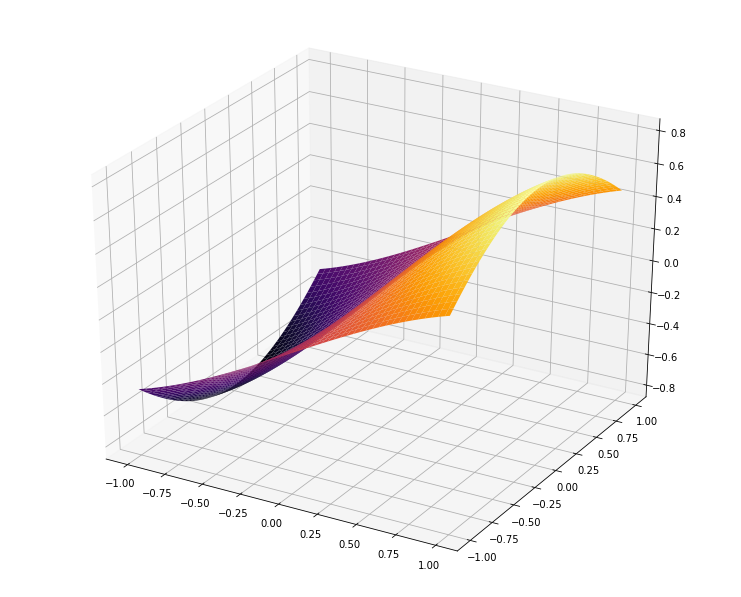

In [15]:
i = np.arange(-1, 1, 0.01)
grid_x, grid_y = np.meshgrid(i, i)
draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [ ]:
flat_image_array = # Ваш код здесь

In [ ]:
# здесь выведите размер нового массива